In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data_path = "../data/"
player_data = pd.read_csv(os.path.join(data_path, "player.csv"), index_col = 0).drop(
    ['player_fifa_api_id', "id"], axis = 1)
player_stats_data = pd.read_csv(os.path.join(data_path, "player_attr.csv"), index_col = 0).drop(
    ['player_fifa_api_id', "id"], axis = 1).dropna()
data = pd.merge(player_data, player_stats_data, on = 'player_api_id', how = 'inner')
print(data.columns.values)

['player_api_id' 'player_name' 'birthday' 'height' 'weight' 'date'
 'overall_rating' 'potential' 'preferred_foot' 'attacking_work_rate'
 'defensive_work_rate' 'crossing' 'finishing' 'heading_accuracy'
 'short_passing' 'volleys' 'dribbling' 'curve' 'free_kick_accuracy'
 'long_passing' 'ball_control' 'acceleration' 'sprint_speed' 'agility'
 'reactions' 'balance' 'shot_power' 'jumping' 'stamina' 'strength'
 'long_shots' 'aggression' 'interceptions' 'positioning' 'vision'
 'penalties' 'marking' 'standing_tackle' 'sliding_tackle' 'gk_diving'
 'gk_handling' 'gk_kicking' 'gk_positioning' 'gk_reflexes']


In [4]:
data['skill'] = data['heading_accuracy'] + data['free_kick_accuracy'] + data['short_passing'] + data['volleys'] + data['dribbling'] + data['curve'] + data['long_passing'] + data['ball_control'] + data['jumping'] + data['long_shots'] +data['positioning'] + data['vision']
data['movement'] = data['acceleration'] + data['sprint_speed'] + data['reactions'] + data['agility'] + data['balance']
data['attacking'] = data['standing_tackle'] + data['sliding_tackle']
data['power'] = data['stamina'] + data['strength']
data['mentality'] = data['aggression'] + data['interceptions']
data['defending'] = data['gk_diving'] + data['gk_handling'] + data['gk_kicking'] + data['gk_positioning'] + data[
    'gk_reflexes']

data_six = data[['player_api_id', 'skill', 'movement', 'attacking', 'power', 'mentality', 'defending']]

In [5]:
data_six.head()

,player_api_id,skill,movement,attacking,power,mentality,defending
0,505942,616.0,295.0,138.0,130.0,141.0,43.0
1,505942,616.0,295.0,138.0,130.0,141.0,43.0
2,505942,616.0,295.0,135.0,130.0,104.0,43.0
3,505942,605.0,294.0,129.0,130.0,102.0,38.0
4,505942,605.0,294.0,129.0,130.0,102.0,38.0


In [6]:
data_six.loc[:, 'skill'] = 10 * data_six.loc[:, 'skill'] / data_six.loc[:, 'skill'].max()
data_six.loc[:, 'movement'] = 10 * data_six.loc[:, 'movement'] / data_six.loc[:, 'movement'].max()
data_six.loc[:, 'attacking'] = 10 * data_six.loc[:, 'attacking'] / data_six.loc[:, 'attacking'].max()
data_six.loc[:, 'mentality'] = 10 * data_six.loc[:, 'mentality'] / data_six.loc[:, 'mentality'].max()
data_six.loc[:, 'power'] = 10 * data_six.loc[:, 'power'] / data_six.loc[:, 'power'].max()
data_six.loc[:, 'defending'] = 10 * data_six.loc[:, 'defending'] / data_six.loc[:, 'defending'].max()

data_six = data_six.groupby('player_api_id').mean()

C:\Users\nieyuzhou\AppData\Local\Temp\ipykernel_8728\42061100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_six.loc[:, 'skill'] = 10 * data_six.loc[:, 'skill'] / data_six.loc[:, 'skill'].max()
C:\Users\nieyuzhou\AppData\Local\Temp\ipykernel_8728\42061100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_six.loc[:, 'movement'] = 10 * data_six.loc[:, 'movement'] / data_six.loc[:, 'movement'].max()
C:\Users\nieyuzhou\AppData\Local\Temp\ipykernel_8728\42061100.py:3: SettingWithCopyWarning: 
A 

In [7]:
data_six = data_six.reset_index()
data_six

,player_api_id,skill,movement,attacking,power,mentality,defending
0,2625,6.143679,6.634820,6.509653,7.116119,7.131398,1.450843
1,2752,4.983792,4.937822,7.364221,7.654698,8.113063,1.079648
2,2768,5.597863,6.452330,8.126126,6.776165,7.351668,1.706438
3,2770,8.094599,6.619958,3.380180,6.074866,5.440285,1.890126
4,2790,6.807287,7.286624,7.762162,7.561497,7.048128,2.628062
...,...,...,...,...,...,...,...
10405,744907,5.858102,6.761243,5.292383,5.556636,3.150219,1.208747
10406,746419,5.023969,7.579618,7.081081,5.828877,5.989305,0.935412
10407,748432,4.602109,5.987261,7.405405,6.256684,5.721925,1.024499
10408,750435,6.243741,6.973343,2.162162,5.508021,2.513369,1.069042


In [8]:
data_six = data_six.dropna(axis = 0, how = 'all')

In [9]:
data_six

,player_api_id,skill,movement,attacking,power,mentality,defending
0,2625,6.143679,6.634820,6.509653,7.116119,7.131398,1.450843
1,2752,4.983792,4.937822,7.364221,7.654698,8.113063,1.079648
2,2768,5.597863,6.452330,8.126126,6.776165,7.351668,1.706438
3,2770,8.094599,6.619958,3.380180,6.074866,5.440285,1.890126
4,2790,6.807287,7.286624,7.762162,7.561497,7.048128,2.628062
...,...,...,...,...,...,...,...
10405,744907,5.858102,6.761243,5.292383,5.556636,3.150219,1.208747
10406,746419,5.023969,7.579618,7.081081,5.828877,5.989305,0.935412
10407,748432,4.602109,5.987261,7.405405,6.256684,5.721925,1.024499
10408,750435,6.243741,6.973343,2.162162,5.508021,2.513369,1.069042


In [10]:
data_test = data_six[0:5].dropna()

In [11]:
print(data_test.columns.values)

['player_api_id' 'skill' 'movement' 'attacking' 'power' 'mentality'
 'defending']


In [12]:
kinds = list(data_test['player_api_id'])

In [13]:
data_test = data_test.drop(['player_api_id'], axis = 1)
labels = data_test.columns.values

In [14]:
result = pd.concat([data_test, data_test[[labels[0]]]], axis = 1)

In [15]:
centers = np.array(result.iloc[:, :])

In [16]:
centers

array([[6.14367895, 6.63481953, 6.50965251, 7.11611917, 7.13139801,
        1.45084314, 6.14367895],
       [4.98379217, 4.93782226, 7.36422136, 7.65469824, 8.11306341,
        1.07964789, 4.98379217],
       [5.59786331, 6.4523304 , 8.12612613, 6.77616501, 7.35166794,
        1.70643759, 5.59786331],
       [8.09459891, 6.61995754, 3.38018018, 6.07486631, 5.4402852 ,
        1.89012621, 8.09459891],
       [6.80728667, 7.2866242 , 7.76216216, 7.56149733, 7.04812834,
        2.62806236, 6.80728667]])

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

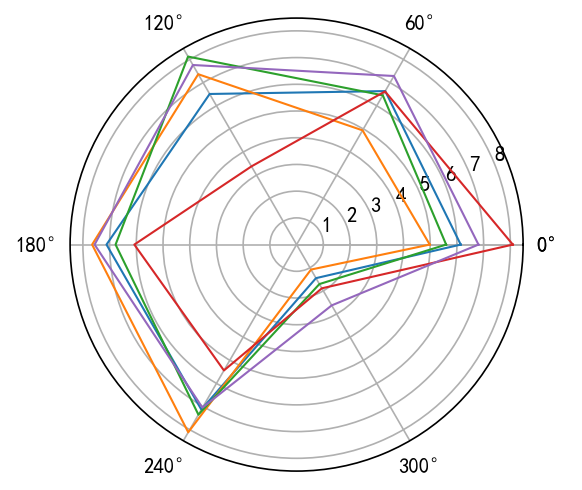

In [17]:
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint = False)
angle = np.concatenate((angle, [angle[0]]))
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, polar = True)
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linewidth = 1, label = kinds[i])
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('different kind')
plt.legend(loc = 'lower right')
plt.show()